# Exploratory Data Analysis with Python

## Introducción a EDA

El conjunto de datos que se utilizará será el de *stroke prediction* que se puede encontrar en: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

#### Importar las librerias requeridas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline
#plt.rcParams['figure.figsize'] = [12, 8]

#### Primera mirada al dataset!

Aquí, vamos a utilizar pandas para leer el archivo csv descargado. A continuación, realice una primera mirada al dataset, identificando el número de filas y columnas en el conjunto de datos.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar el dataset

data_df = pd.read_csv("/content/drive/MyDrive/UCEMA/3er año/Inteligencia Artifical/Data/healthcare-dataset-stroke-data.csv")

In [ ]:
data_df.shape

(5110, 12)

In [ ]:
# Identificar cantidad de filas y columnas
print(("The dataset has {} rows and {} columns").format(data_df.shape[0],data_df.shape[1]))


The dataset has 5110 rows and 12 columns


In [ ]:
# Revisar los primeros registros
data_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Ultimas filas
data_df.tail()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
# Ver el dataset completo
data_df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Trasponerlo
data_df.T


,0,1,2,3,4,5,6,7,8,9,...,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109
id,9046,51676,31112,60182,1665,56669,53882,10434,27419,60491,...,68398,36901,45010,22127,14180,18234,44873,19723,37544,44679
gender,Male,Female,Male,Female,Female,Male,Male,Female,Female,Female,...,Male,Female,Female,Female,Female,Female,Female,Female,Male,Female
age,67.0,61.0,80.0,49.0,79.0,81.0,74.0,69.0,59.0,78.0,...,82.0,45.0,57.0,18.0,13.0,80.0,81.0,35.0,51.0,44.0
hypertension,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
heart_disease,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ever_married,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed,Private,Private,Private,Private,Private,...,Self-employed,Private,Private,Private,children,Private,Self-employed,Self-employed,Private,Govt_job
Residence_type,Urban,Rural,Rural,Urban,Rural,Urban,Rural,Urban,Rural,Urban,...,Rural,Urban,Rural,Urban,Rural,Urban,Urban,Rural,Rural,Urban
avg_glucose_level,228.69,202.21,105.92,171.23,174.12,186.21,70.09,94.39,76.15,58.57,...,71.97,97.95,77.93,82.85,103.08,83.75,125.2,82.99,166.29,85.28
bmi,36.6,NaN,32.5,34.4,24.0,29.0,27.4,22.8,NaN,24.2,...,28.3,24.5,21.7,46.9,18.6,NaN,40.0,30.6,25.6,26.2


#### Información de los Atributos

> 1) **id:** unique identifier

> 2) **gender:** "Male", "Female" or "Other"

> 3) **age:** age of the patient

> 4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

> 5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

> 6) **ever_married:** "No" or "Yes"

> 7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

> 8) **Residence_type:** "Rural" or "Urban"

> 9) **avg_glucose_level:** average glucose level in blood

> 10) **bmi:** body mass index

> 11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

> 12) **stroke:** 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### Analizando el dataset

#### Identificar el número de columnas, si hay valores perdidos y también el tipo de características / variables que se encuentran en el conjunto de datos.

In [ ]:
columnas= data_df.columns
print(f'Las columnas del dataset son: {columnas}')

Las columnas del dataset son: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
print(f"El dataset tiene {data_df.shape[1]} columnas")

El dataset tiene 12 columnas


In [ ]:
data_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

#### Filtre el dataset considerando por un lado a los datos tipo objeto y por el otro los numericos

In [ ]:
df_objeto = data_df.select_dtypes("object")
df_objeto.dtypes

gender            object
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
dtype: object

In [ ]:
df_numerico = data_df.select_dtypes(exclude = "object")
df_numerico.dtypes

id                     int64
age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

#### ¿Qué persona tiene el IMC máximo del conjunto de datos?

In [ ]:
maximo = data_df.bmi.max()
data_df[data_df.bmi == maximo]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0


#### Preguntas sobre la mirada inicial

 1. ¿Está correlacionado la variable gender con stroke? ¿Tienen más probabilidades de sufrirlo los hombres o las mujeres?

In [ ]:
data_df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
from scipy.stats import f_oneway
CategoryGroupLists = data_df.groupby('gender')['stroke'].apply(list)
Results = f_oneway(*CategoryGroupLists)
print('P-Value is: ', Results[1])

P-Value is:  0.7896499672462672


Como el P valor dio mayor a 0.05, podemos inferir que las variables no estan correlacionadas

## Otras preguntas

1. ¿Cuál es el valor de la décima observación de la característica edad desde la parte superior del conjunto de datos?

Como el indice se inicializa en 0, hay que tomar el 9, para ver la decima observación.

In [ ]:
decima_age = data_df['age'][9]
print(f"La decima observacion tiene una edad de {decima_age}")

La decima observacion tiene una edad de 78.0


2. ¿Cuál es el valor de la 7ª observación de la característica bmi desde el fondo del conjunto de datos?

In [ ]:
septima_bmi = data_df['bmi'][len(data_df)- 7]
print(f"La septima observacion tiene un bmi de {septima_bmi}")

La septima observacion tiene un bmi de 46.9


3. ¿Cuál es el id number y el work_type de la persona con el nivel medio de glucosa más bajo del conjunto de datos?

In [ ]:
minimo_glucosa =  data_df.avg_glucose_level.min()
work_type_person = data_df[data_df.avg_glucose_level == minimo_glucosa][['id', 'work_type']]
work_type_person

,id,work_type
4886,60562,Private


In [ ]:
print(work_type_person.id)
print(work_type_person.work_type)


4886    60562
Name: id, dtype: int64
4886    Private
Name: work_type, dtype: object


4. Imprime un dataframe filtrado, basado en tres condiciones:

   a) Edad inferior a 30 años
   b) Tipo_residencia es Rural
   c) El sexo es femenino
   
   ¿Cuántas filas hay en el conjunto de datos filtrado?

a) Edad inferior a 30 años

In [ ]:
menor_30_años = data_df[data_df.age < 30]
menor_30_años

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.6,Unknown,0
253,46136,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0
5103,22127,Female,18.00,0,0,No,Private,Urban,82.85,46.9,Unknown,0


b) Tipo de residencia es rural

In [ ]:
residencia_rural = data_df[data_df.Residence_type == 'Rural']
residencia_rural

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


c) Genero femenino

In [ ]:
genero_femenino = data_df[data_df.gender == 'Female']
genero_femenino

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


Las 3 condiciones juntas

In [ ]:
cond1 = data_df.age < 30
cond2 = data_df.Residence_type == 'Rural'
cond3 = data_df.gender == 'Female'
rural_female_30 = data_df[cond1 & cond2 & cond3]
rural_female_30

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
292,44338,Female,16.00,0,0,No,children,Rural,110.63,19.5,Unknown,0
294,34974,Female,22.00,0,0,No,Private,Rural,79.81,27.7,Unknown,0
312,68249,Female,27.00,0,0,Yes,Private,Rural,85.60,21.4,Unknown,0
328,29865,Female,21.00,0,0,No,Private,Rural,89.44,21.9,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5027,62416,Female,26.00,0,0,Yes,Private,Rural,73.29,27.8,never smoked,0
5031,67465,Female,20.00,0,0,No,Private,Rural,117.59,17.1,never smoked,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0


## Analisis Univariado de datos

Números estadisticos resumidos

In [ ]:
data_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Variable Target - Stroke

Analice la distribución de la variable target y grafique en un grafico de sectores (torta)

In [ ]:
data_df.stroke.dtypes

dtype('int64')

In [ ]:
data_df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Podemos observar que se encuentra desbalanceada la variable, ya que hay mucha mas cantidad de 0 que de 1

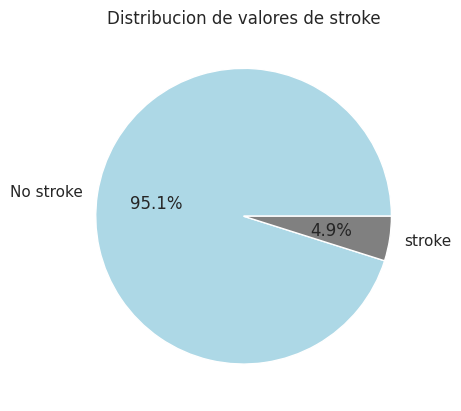

In [ ]:
stroke_etiquetas = ["No stroke", "stroke"]
plt.pie(x = data_df.stroke.value_counts(), colors = ['lightblue', 'grey'], labels = stroke_etiquetas, autopct = "%1.1f%%")
plt.title('Distribucion de valores de stroke')
plt.show()

#### Variables numéricas Continuas - age, avg_glucose_level, bmi

**Histograma**

Un histograma muestra datos numéricos agrupándolos en "intervalos" de igual anchura. Cada intervalo se representa como una barra cuya altura corresponde al número de puntos de datos que contiene.

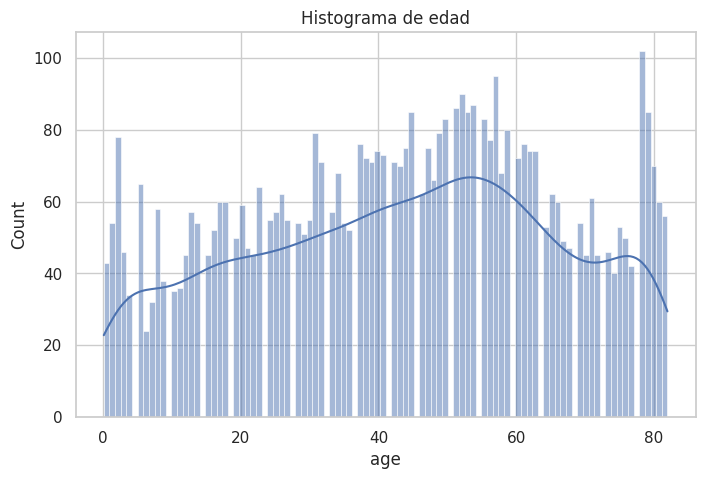

In [ ]:
# Gráfico simple - age

plt.figure(figsize=(8, 5))
sns.histplot(data_df['age'], bins=100,kde=True)
plt.title("Histograma de edad")
plt.show()

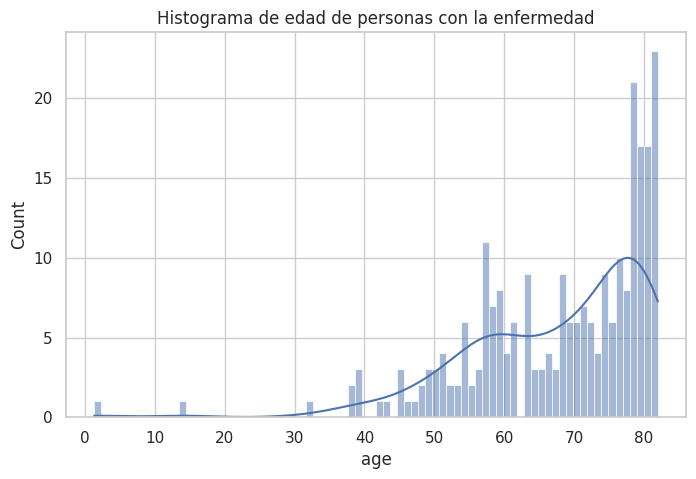

In [ ]:
# Histograma de "age" en gente con "stroke"
age_stroke = data_df[data_df.stroke == 1]

plt.figure(figsize=(8, 5))
sns.histplot(age_stroke['age'], bins=80, kde=True)
plt.title("Histograma de edad de personas con la enfermedad")
plt.show()

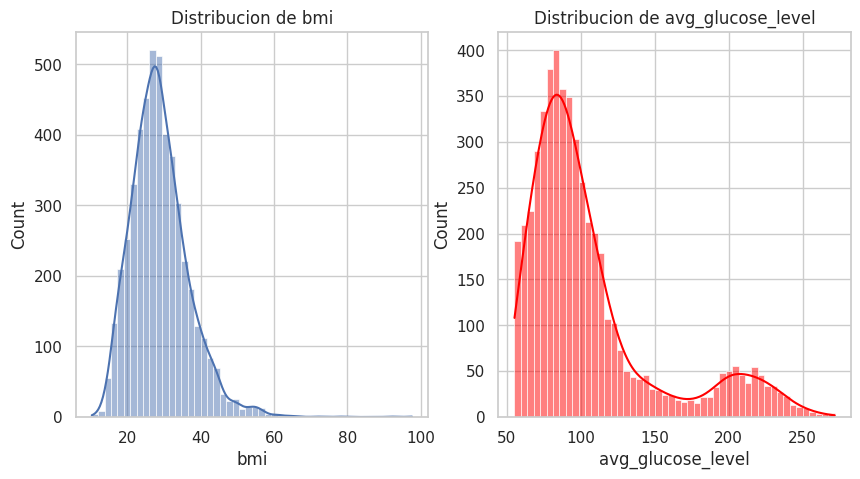

In [ ]:
# subplots - bmi, avg_glucose_level
variable_1 = 'bmi'
variable_2 = 'avg_glucose_level'
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable_1}")
sns.histplot(data = data_df, x = f"{variable_1}", kde=True, ax = ax[0], bins = 50)

ax[1].set_title(f"Distribucion de {variable_2}")
sns.histplot(data = data_df, x = f"{variable_2}", kde=True, ax = ax[1], bins = 50, color = 'red')
plt.show()

#### Boxplots and Outliers

Un diagrama de caja es una forma estandarizada de mostrar la distribución de los datos basada en un resumen de cinco números ("mínimo", primer cuartil (Q1), mediana, tercer cuartil (Q3) y "máximo"). Puede informarle sobre sus valores atípicos y cuáles son. También puede indicarle si sus datos son simétricos, con qué precisión están agrupados y si están sesgados y de qué forma.

Represente en Diagramas de Cajas / Boxplot las variables númericas del punto anterior e interprete los resultados

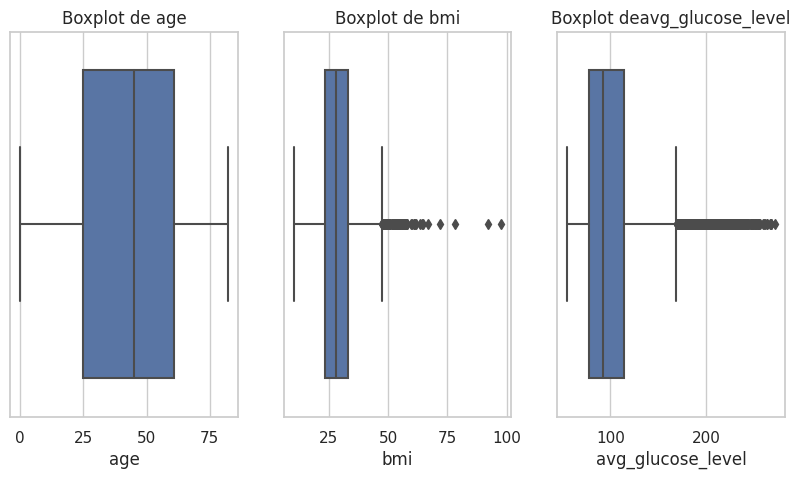

In [ ]:
variable_1 = 'age'
variable_2 = 'bmi'
variable_3 = "avg_glucose_level"

fig, ax = plt.subplots(1,3,figsize=(10,5))

ax[0].set_title(f"Boxplot de {variable_1}")
sns.boxplot(data = data_df, x = f"{variable_1}", ax=ax[0])

ax[1].set_title(f"Boxplot de {variable_2}")
sns.boxplot(data = data_df, x = f"{variable_2}", ax=ax[1])

ax[2].set_title(f"Boxplot de{variable_3}")
sns.boxplot(data = data_df, x = f"{variable_3}", ax=ax[2])

plt.show()

1. **Boxplot age**:
Podemos que el valor mediano es al rededor de lso 40 años, sinedo el minimo 0 y el maximo aproximadamente 80. Este grafico no presenta outliers.
2. **Boxplot bmi**:
El valor mediano es al rededor de 28. Podemos ver que hay unos valores que se podrian considerar ocmo outliers ya que estan separados del resto, pero estos se deben analizar con mas profundidad para saber quer hacer.
3. **Boxplot avg_glucose_level**: el valor mediano es alrededor del 100, y vemos unos "puntos" a la izquierda que podrian ser outliers pero no considero que sean asi,ya que hay una gran cantida dde ellos, y un valor mayor a 200 refiere a tener diabetes.


#### ¿Debemos eliminar o mantener los valores atípicos?

In [ ]:
data_df[data_df.bmi>65]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


Considero que no es correcto eliminar los outliers. En primer los de bmi, no los consideraria ocmo tales ya que siguen una conitnuidad. Ademas los de glucosa son valores reales, como fue explcado en el punto anterior

#### Variables Categoricas - gender, ever_married, work_type, residence_type, smoking_status

In [ ]:
# Utilice la funcion describe para analizar las columnas no numericas
df_objeto.describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


#### Diagrama de Barras

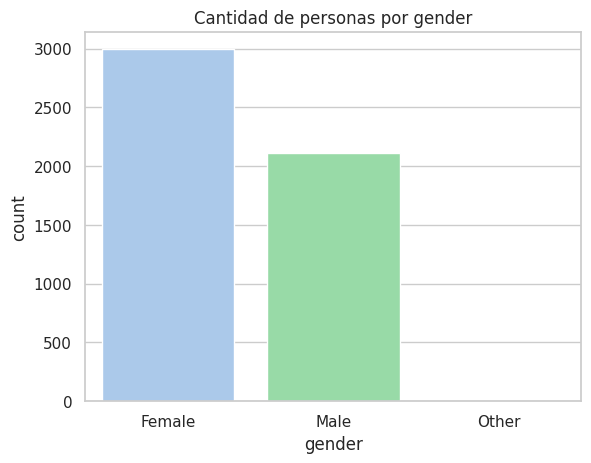

In [ ]:
#  Diagrama de Barras para gender, ever_married y work_type
ax = sns.countplot(data = data_df, x = 'gender',
              order = data_df['gender'].value_counts().index, palette=['#a1c9f4', '#8de5a1', '#ff9f9b'])
sns.set(rc={"figure.figsize":(5, 3)})
ax.set_title('Cantidad de personas por gender')
plt.show()

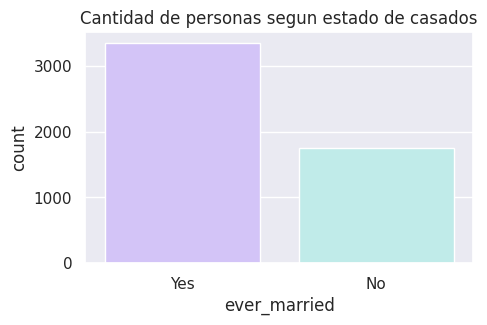

In [ ]:
ax = sns.countplot(data = data_df, x = 'ever_married',
              order = data_df['ever_married'].value_counts().index, palette = ['#d0bbff',  '#b9f2f0'])
sns.set(rc={"figure.figsize":(5, 3)})
ax.set_title('Cantidad de personas segun estado de casados')
plt.show()

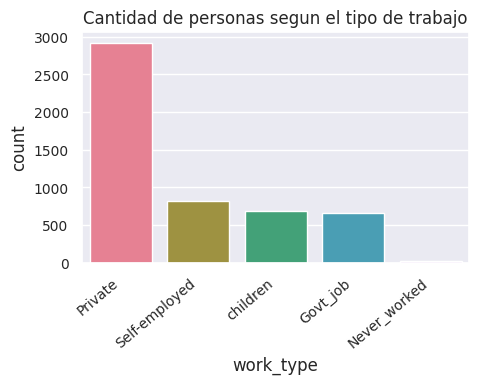

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
ax = sns.countplot(data = data_df, x = 'work_type',
              order = data_df['work_type'].value_counts().index, palette = 'husl')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set(rc={"figure.figsize":(5, 3)})
ax.set_title('Cantidad de personas segun el tipo de trabajo')
plt.show()

In [ ]:
# Lo mismo que arriba para las personas que han sufrido la enfermedad
enfermos_df = data_df[data_df.stroke == 1]

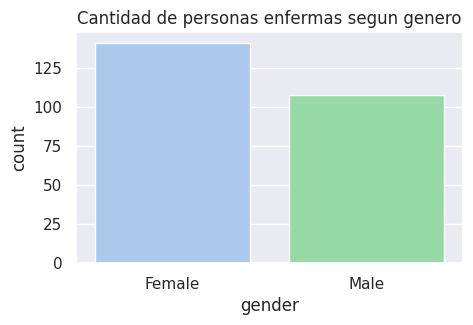

In [ ]:
ax = sns.countplot(data = enfermos_df, x = 'gender',
              order = enfermos_df['gender'].value_counts().index, palette=['#a1c9f4', '#8de5a1', '#ff9f9b'])
sns.set(rc={"figure.figsize":(5, 3)})
ax.set_title('Cantidad de personas enfermas segun genero')
plt.show()

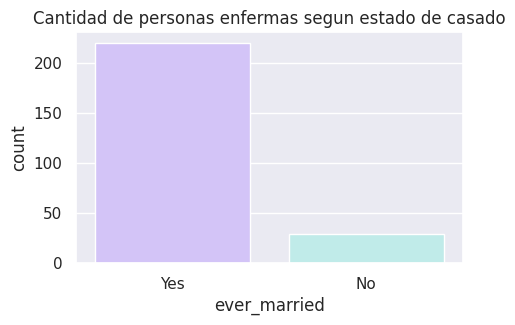

In [ ]:
ax = sns.countplot(data = enfermos_df, x = 'ever_married',
              order = enfermos_df['ever_married'].value_counts().index, palette = ['#d0bbff',  '#b9f2f0'])
sns.set(rc={"figure.figsize":(5, 3)})
ax.set_title('Cantidad de personas enfermas segun estado de casado')
plt.show()

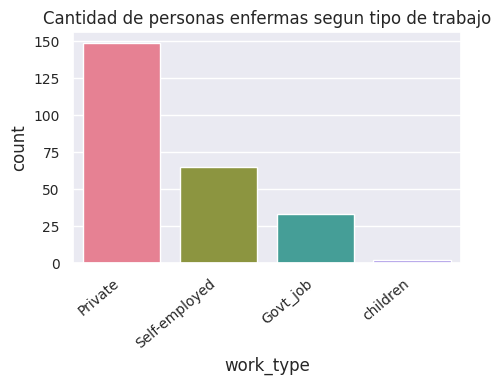

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
ax = sns.countplot(data = enfermos_df, x = 'work_type',
              order = enfermos_df['work_type'].value_counts().index, palette = 'husl')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set(rc={"figure.figsize":(5, 3)})
ax.set_title('Cantidad de personas enfermas segun tipo de trabajo')
plt.show()

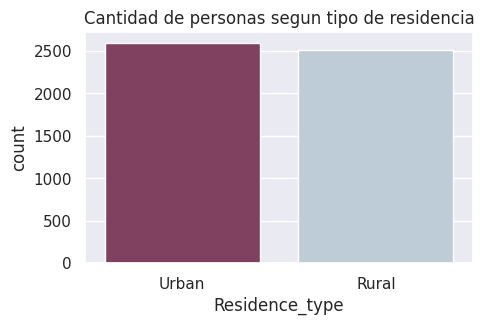

In [ ]:
#  Diagrama de Barras para residence_type y smoking_status
ax = sns.countplot(data = data_df, x = 'Residence_type',
              order = data_df['Residence_type'].value_counts().index, palette = ['#89375F', '#BACDDB'])
sns.set(rc={"figure.figsize":(8, 5)})
ax.set_title('Cantidad de personas segun tipo de residencia')
plt.show()


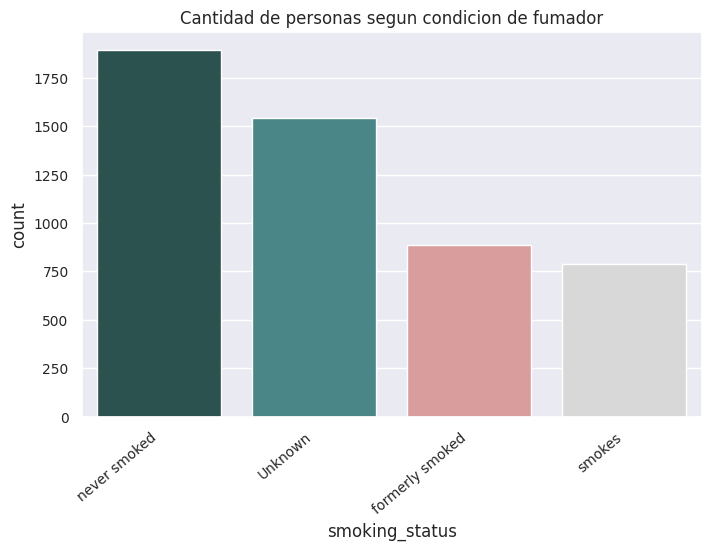

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
ax = sns.countplot(data = data_df, x = 'smoking_status',
              order = data_df['smoking_status'].value_counts().index, palette = ['#245953', '#408E91', '#E49393', '#D8D8D8'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set(rc={"figure.figsize":(8, 5)})
ax.set_title('Cantidad de personas segun condicion de fumador')
plt.show()

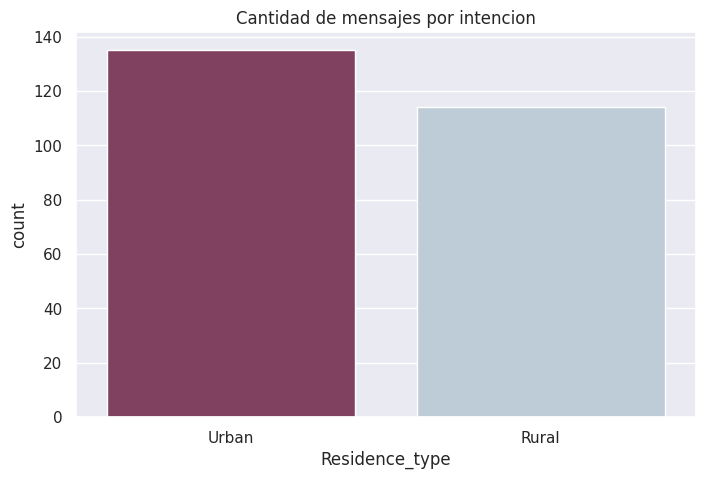

In [ ]:
# Lo mismo que arriba pero para personas que sufrieron la enfermedad
ax = sns.countplot(data = enfermos_df, x = 'Residence_type',
              order = enfermos_df['Residence_type'].value_counts().index, palette = ['#89375F', '#BACDDB'])
sns.set(rc={"figure.figsize":(8, 5)})
ax.set_title('Cantidad de mensajes por intencion')
plt.show()


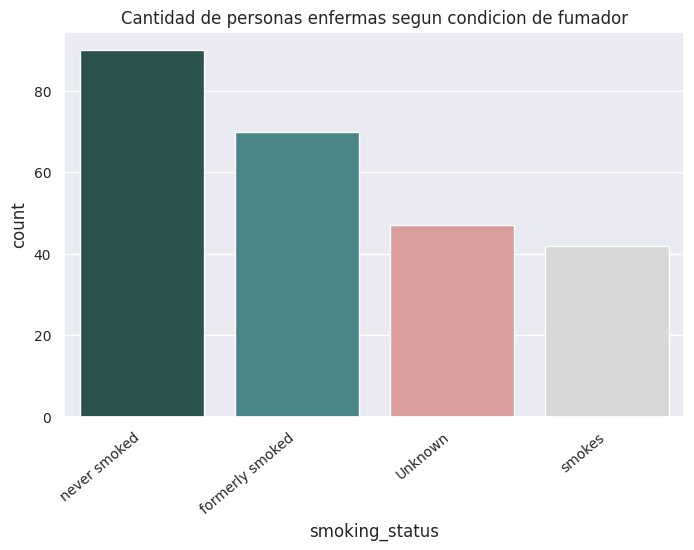

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
ax = sns.countplot(data = enfermos_df, x = 'smoking_status',
              order = enfermos_df['smoking_status'].value_counts().index, palette = ['#245953', '#408E91', '#E49393', '#D8D8D8'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set(rc={"figure.figsize":(8, 5)})
ax.set_title('Cantidad de personas enfermas segun condicion de fumador')
plt.show()

## Analisis Bivariado

#### ¿Las personas mayores tienden a tener más accidentes cerebrovasculares?

In [ ]:
data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data_df.groupby(['stroke', 'age']).agg(cantidad = ('id', 'count'))

cantidad
stroke age            
0      0.08          2
       0.16          3
       0.24          5
       0.32          5
       0.40          2
...                ...
1      78.00        21
       79.00        17
       80.00        17
       81.00        14
       82.00         9

[148 rows x 1 columns]

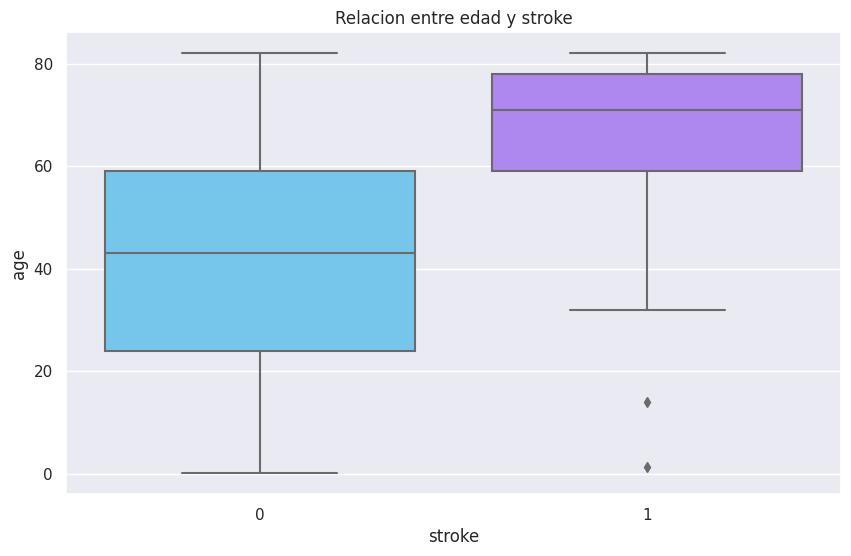

In [ ]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='stroke', y='age', data=data_df, palette = ['#62CDFF', '#AA77FF'])
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.title('Relacion entre edad y stroke')
plt.show()

Podemos observar que mayoritariamente las personas que padecieron un derrame son las personas de mayor edad.

#### Existe una conexión entre el tipo de trabajo que realiza y su índice de masa corporal?

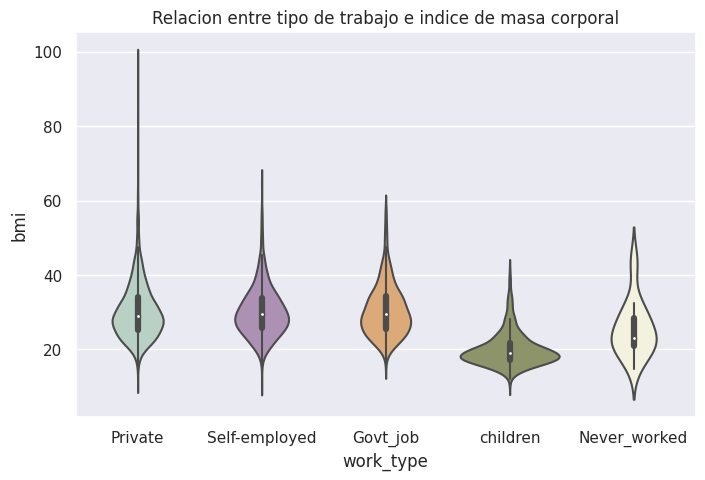

In [ ]:
sns.violinplot(x="work_type", y="bmi", data=data_df, palette= ['#B5D5C5', '#B08BBB', '#ECA869', '#939B62', '#F5F5DC'])
plt.title('Relacion entre tipo de trabajo e indice de masa corporal')
plt.show()

No es posibel establecer una relacion entre el tipo de trabajo y el bmi, ya que vemos la mayor distribucion de todos los tipos en el mismo rango aproximadamente, y los chicos es natural que tengan un bmi menor.

#### ¿Las personas mayores tienen un nivel de glucosa promedio más alto?

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='age', ylabel='avg_glucose_level'>

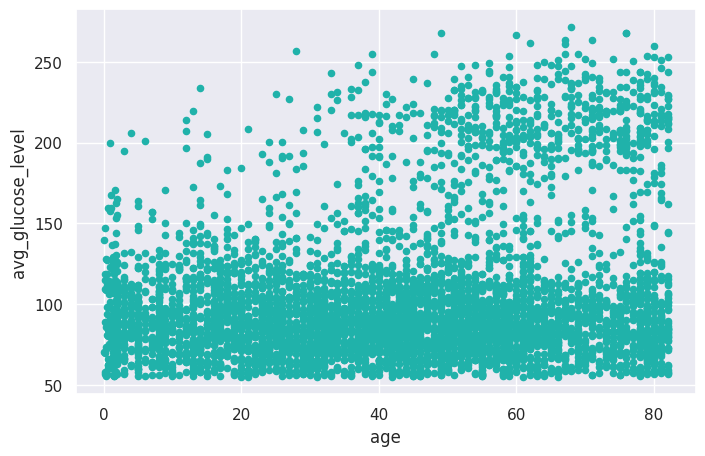

In [ ]:
data_df.plot(kind='scatter',
          x='age',
          y='avg_glucose_level', color = 'lightseagreen')

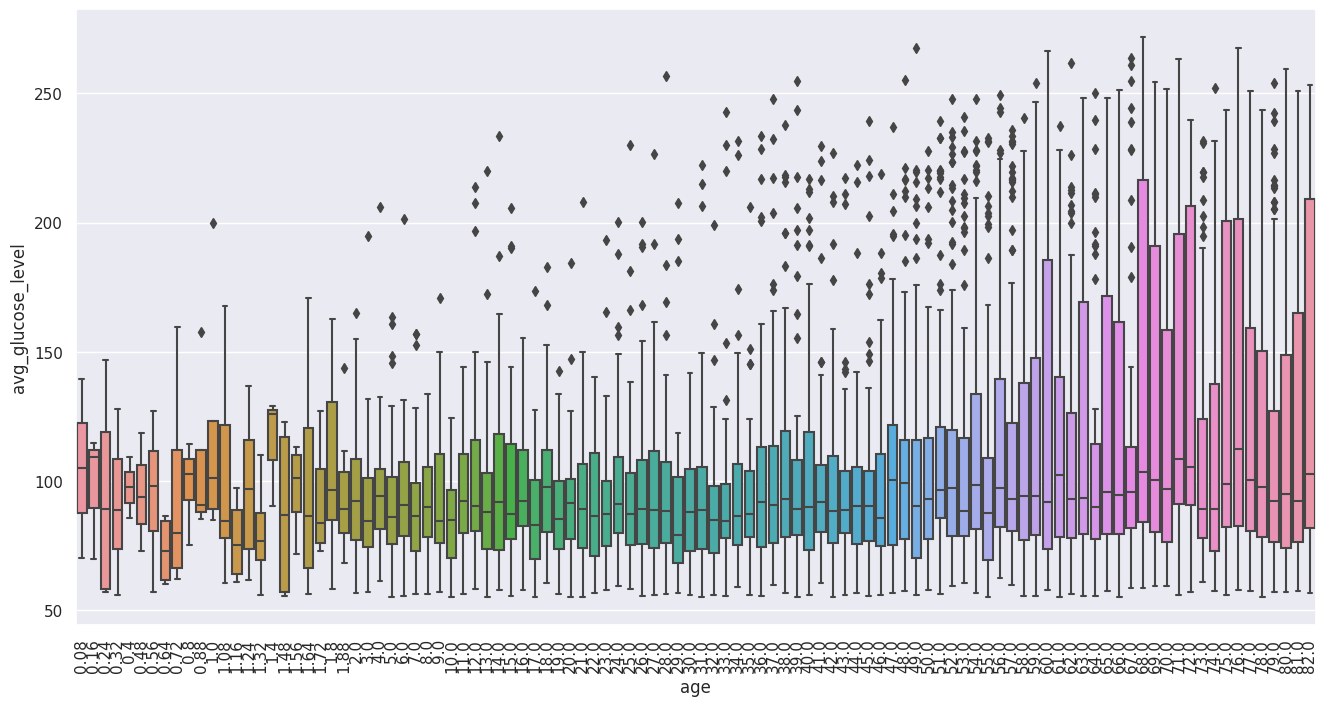

In [ ]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='age', y="avg_glucose_level", data=data_df)

plt.xticks(rotation=90);

Mientras que no es normal que las personas mayores tengan niveles mas altos de glucosa, si son mas propensos a tener niveles mas altos de glucosa a ocmparacion de las otras edades.

#### Tabaquismo frente a accidente cerebrovascular y tipo de trabajo frente a hipertensión

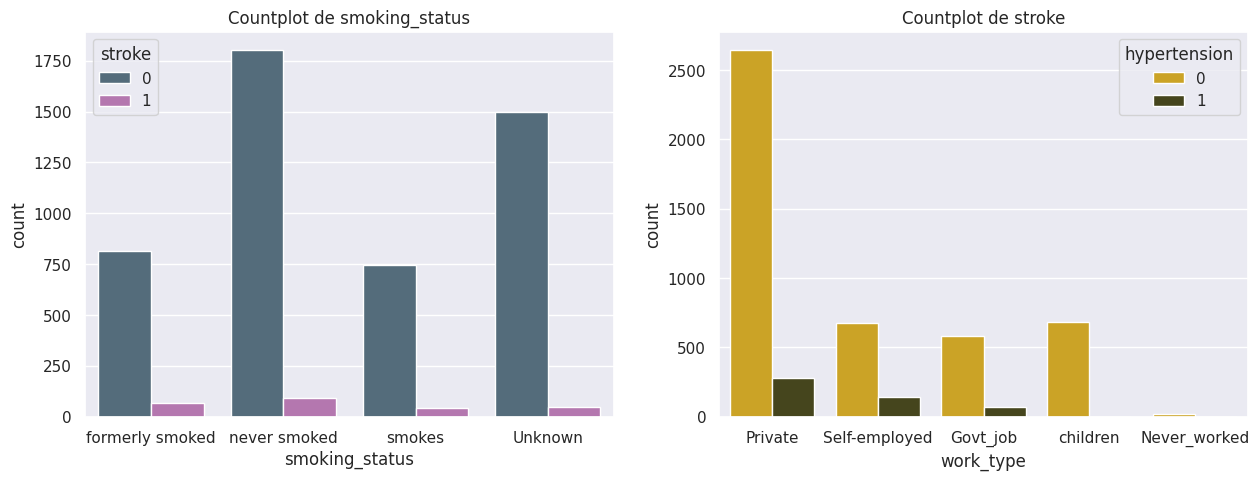

In [ ]:
import seaborn as sns

variable_1 = 'smoking_status'
variable_2 = 'stroke'
variable_3 = "work_type"
variable_4 = "hypertension"

fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].set_title(f"Countplot de {variable_1}")
sns.countplot(data = data_df, x = f"{variable_1}", hue = f"{variable_2}", ax=ax[0], palette = ['#4E6E81', '#BE6DB7'] )

ax[1].set_title(f"Countplot de {variable_2}")
sns.countplot(data = data_df, x = f"{variable_3}", hue = f"{variable_4}", ax=ax[1], palette = ['#E7B10A', '#4C4B16'])

plt.show()

Es importante  tener en cuenta que la variable stroke esta desbalanceada, por lo que hay mas personas que no padecieron la enfermedad que las que si.
Pareceria que el ser fumador o no no tiene un gran impacto, la mayoria nunca fumo. Por otro lado, no se puede estabelcer tanta relacion con el tipo de trabajo poruqe tambien sucede que la mayoria de las perosnas tienen un trabajo privado y eso se traslada a aquellos que tuvieron un derrame.

## Ejercicio

Preguntas a resolver:
   
   a) ¿Cuál es el porcentaje de personas con hipertensión en el conjunto de datos?
   
   b) En los diferentes valores dentro de la característica ""smoking_status"", ¿los hombres superan en número a las mujeres en alguno de ellos?
   
   c) ¿Qué me puede decir sobre la relación entre el tipo de trabajo y la edad?
   
   Todas las figuras deben contener títulos.

In [ ]:
smoking_gender = pd.crosstab(data_df['gender'],data_df['smoking_status']).apply(lambda x: x/x.sum()*100)
smoking_gender

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,54.145078,53.898305,64.957717,57.287706
Male,45.854922,45.988701,35.042283,42.712294
Other,0.000000,0.112994,0.000000,0.000000


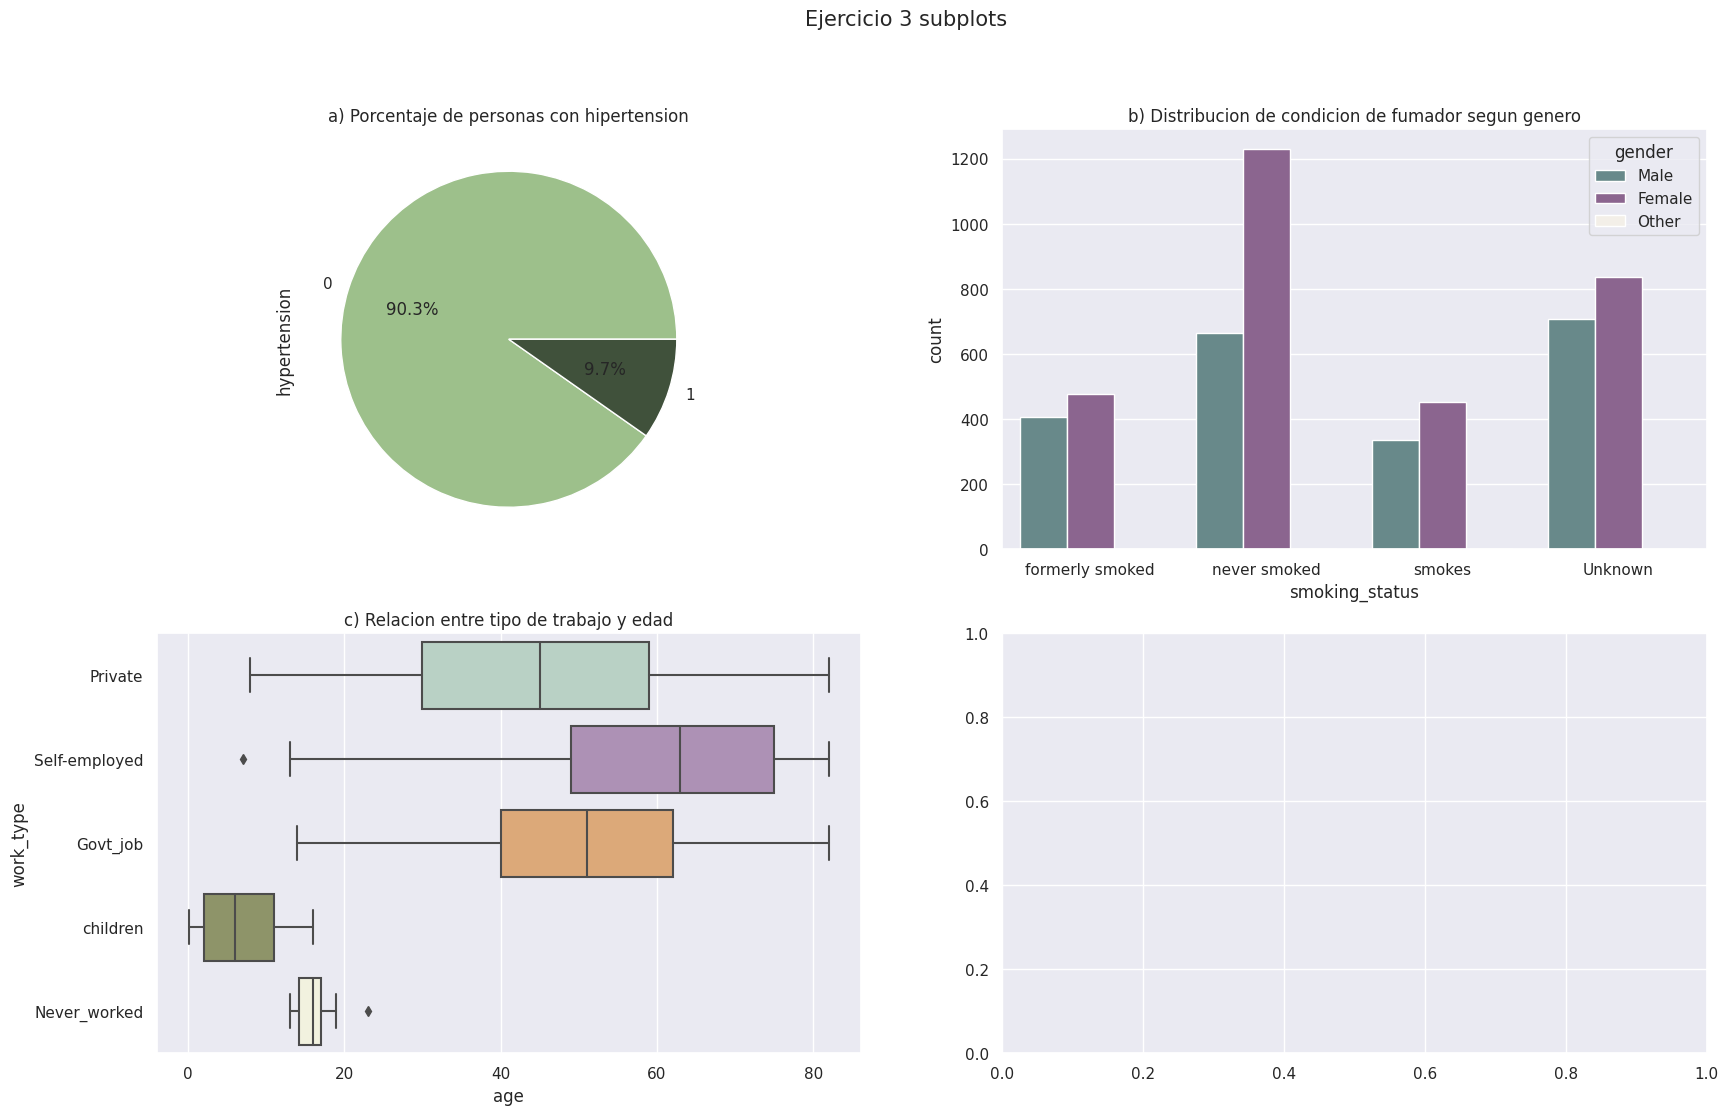

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(20,12))

data_df.hypertension.value_counts().plot(ax=ax[0,0], kind ='pie', title = 'a) Porcentaje de personas con hipertension', autopct='%1.1f%%', colors = ['#9DC08B','#40513B'])

sns.countplot(data = data_df, x = 'smoking_status', hue = 'gender', ax=ax[0,1],  palette = ['#628E90', '#905E96', '#F5EFE6'] ).set(title = 'b) Distribucion de condicion de fumador segun genero')

sns.boxplot(x='age', y="work_type", data=data_df, ax=ax[1,0], palette= ['#B5D5C5', '#B08BBB', '#ECA869', '#939B62', '#F5F5DC']).set(title='c) Relacion entre tipo de trabajo y edad')

fig.suptitle('Ejercicio 3 subplots', fontsize=15)
plt.show()

## Missing Data

Analice las variabels con valores nulos y calcule los porcentajes de dichos valores por variable

In [ ]:
data_df.isna().sum()/data_df.count()

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.040945
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [ ]:
data_df.isna().sum()/data_df.count() *100

id                   0.00000
gender               0.00000
age                  0.00000
hypertension         0.00000
heart_disease        0.00000
ever_married         0.00000
work_type            0.00000
Residence_type       0.00000
avg_glucose_level    0.00000
bmi                  4.09452
smoking_status       0.00000
stroke               0.00000
dtype: float64

Imprima los registros del data set con valores faltantes

In [ ]:
data_df.loc[data_df.isna().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


Crear un flag para indicar los valores faltantes para las variables con valores nulos

In [ ]:
for col in data_df.columns:
    if data_df[col].isnull().any():
        data_df[col + '_nan'] = np.where(data_df[col].isnull(), 1, 0)

data_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_nan
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,1
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0


Rellene los valores faltantes con la media

Como en el punto anterior notamos que lso valores faltantes estan en la columna bmi...

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

imputer.fit(data_df[['bmi']])

data_df['bmi'] = imputer.transform(data_df[['bmi']])

In [ ]:
data_df.isna().sum()/data_df.count() *100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
bmi_nan              0.0
dtype: float64

## Análisis de Correlación


Analice la correlación entre las variables, presente un heatmap y extraiga conclusiones

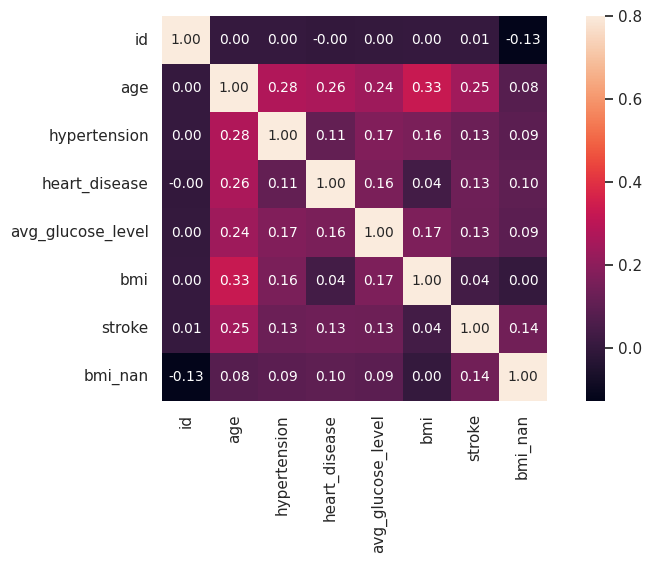

In [ ]:
corrmat = data_df.corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corrmat, cbar=True, annot=True, vmax=.8, square=True, fmt='.2f', annot_kws={'size': 10});
plt.show()

No hay ninguna variable que sea la mas influyente sobre 'stroke', la mas relevante seria edad, pero es del 25%, y la que menos influencia tiene es
(sin contar id) es el bmi. Hay que tener en cuneta que aca no aparece la variable genero, ni tipo de trabajo, ni  estado de fumador, ni estado civil, ni tipo de residencia para ello hay que convertir sus categroias en numericas

In [ ]:
data_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_nan'],
      dtype='object')

In [ ]:
print(data_df.ever_married.unique())
print(data_df.work_type.unique())
print(data_df.Residence_type.unique())
print(data_df.smoking_status.unique())
print(data_df.gender.unique())

['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Male' 'Female' 'Other']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse=False, drop='if_binary')
data_df['ever_married'] = binary_encoder.fit_transform(data_df[['ever_married']])
data_df['Residence_type'] = binary_encoder.fit_transform(data_df[['Residence_type']])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import OneHotEncoder

gender_ohe = OneHotEncoder(sparse=False)

data_df['Male'],data_df['Female'],data_df['Other']  = gender_ohe.fit_transform(data_df[['gender']]).T

data_df.drop(columns=['gender'], inplace = True)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import OneHotEncoder

gender_ohe = OneHotEncoder(sparse=False)

data_df['Private'],data_df['Self-employed'],data_df['Govt_job'],data_df['children'], data_df['Never_worked']  = gender_ohe.fit_transform(data_df[['work_type']]).T

data_df.drop(columns=['work_type'], inplace = True)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import OneHotEncoder

gender_ohe = OneHotEncoder(sparse=False)

data_df['formerly smoked'],data_df['never smoked'],data_df['smokes'],data_df['Unknown']= gender_ohe.fit_transform(data_df[['smoking_status']]).T

data_df.drop(columns=['smoking_status'], inplace = True)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data_df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,bmi_nan,...,Other,Private,Self-employed,Govt_job,children,Never_worked,formerly smoked,never smoked,smokes,Unknown
0,9046,67.0,0,1,1.0,1.0,228.69,36.600000,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,1.0,0.0,202.21,28.893237,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,1.0,0.0,105.92,32.500000,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,1.0,1.0,171.23,34.400000,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,1.0,0.0,174.12,24.000000,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


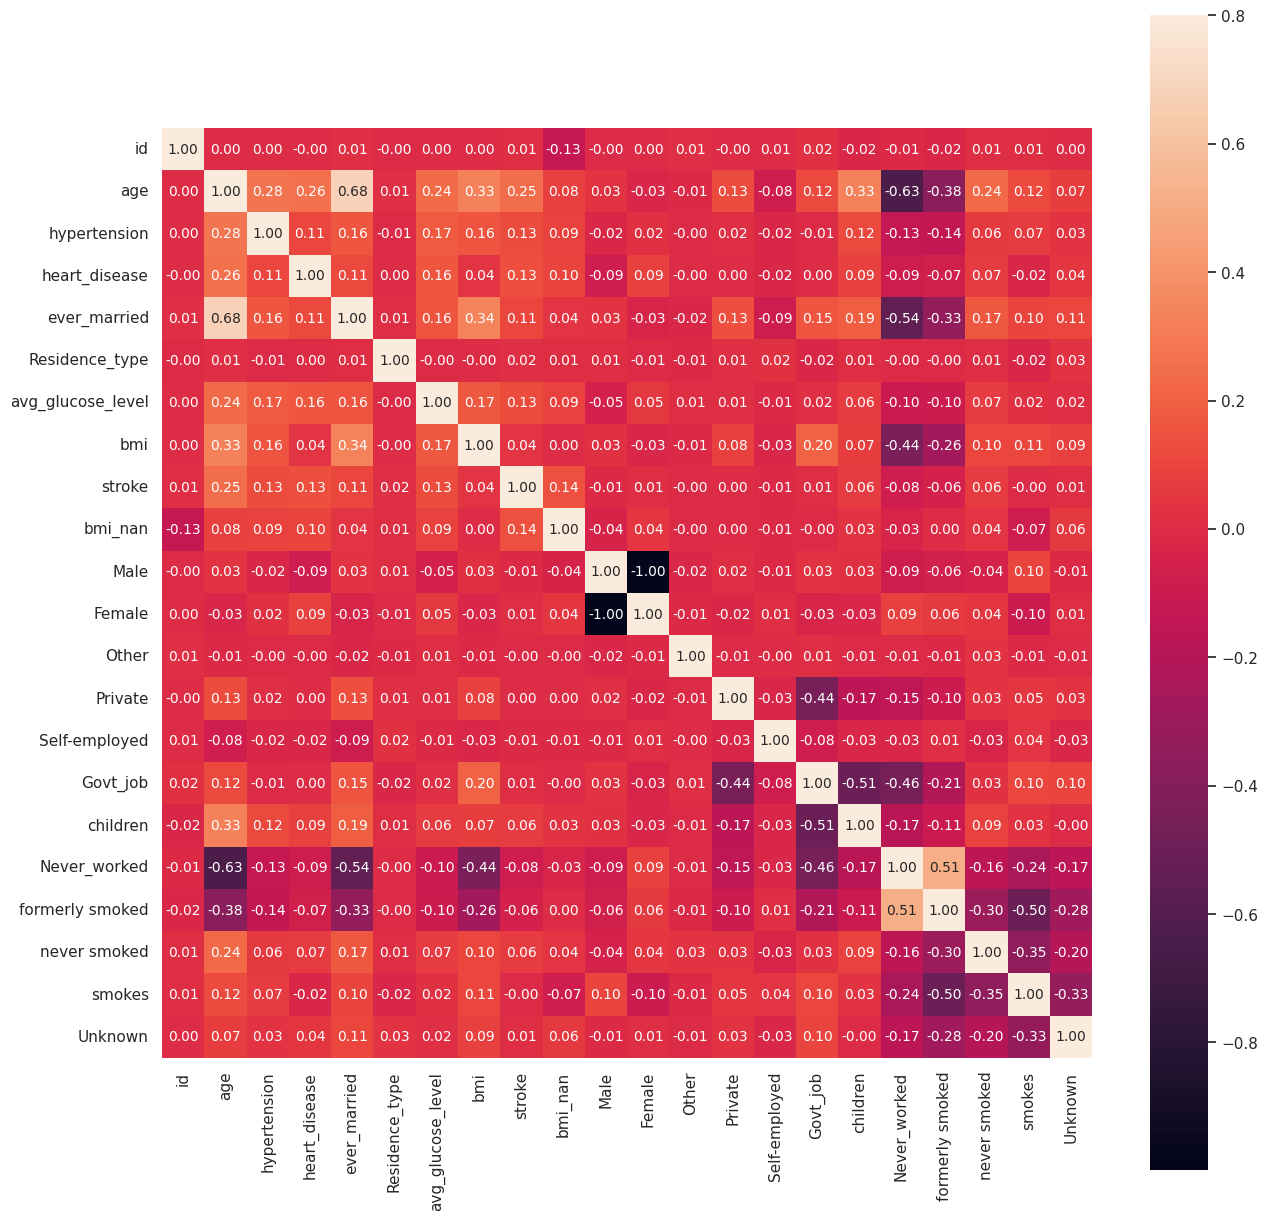

In [ ]:
corrmat = data_df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, cbar=True, annot=True, vmax=.8, square=True, fmt='.2f', annot_kws={'size': 10});
plt.show()

Habiendo hecho esto no se encuentran conclusiones diferentes a las anteriores.
Pero si podemso encontrar cosas no relacioandas al 'stroke'. Por ejemplo, es natural que aquellas personas de menor edad nunca se hayan casado, ni hayan trabajado, y que posean un menor bmi